Now we will focus on Senator Voting data. This data provides information about senator vote $x$ and senator political affiliation $y$. We provide you with four different vectors $(a_1, a_2, a_3, a_4)$ precomputed by the EECS127 staff. Each of these vectors can be used to define a linear function $f_a: x \rightarrow a^Tx$.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
senator_df =  pd.read_csv('data_matrix.csv', index_col=0)
a_vectors = np.loadtxt('vectors.txt').reshape(4, 542)
affiliation_file = open("politician_labels.txt", "r")
affiliations = np.array([line.split('\n')[0].split(' ')[1] for line in affiliation_file.readlines()])

In [3]:
senator_df.head()

,bill_type bill_name bill_ID,missing_votes,Arlen Specter (PA),Barack H. Obama (IL),BarbaraA Mikulski(MD),BarbaraBoxer(CA),Bill Nelson(FL),BlancheL.Lincoln(AR),ByronL.Dorgan(ND),C.SaxbyChambliss(GA),...,SusanM.Collins(ME),TedStevens(AK),ThadCochran(MS),ThomasAllen'Tom'Coburn(OK),ThomasRichardCarper(DE),Thomas'Tom'Harkin(IA),TimP.Johnson(SD),TrentLott(MS),WayneA.Allard(CO),WilliamH.'Bill'Frist(TN)
2,Appropriations_Transit Security Amendment_3866,0.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
3,Budget_Spending_and_Taxes_2007 Budget Resoluti...,0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
4,"""Budget, Spending and Taxes_Debt Limit Increas...",0.0,1.0,-1.0,-1.0,-1.0,-1.0,-1.0,-1.0,1.0,...,1.0,1.0,1.0,-1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0
5,"""Budget, Spending and Taxes_Education Funding ...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0
6,"Budget, Spending and Taxes_Reinstate Pay-As-Yo...",0.0,-1.0,1.0,1.0,1.0,1.0,1.0,1.0,-1.0,...,1.0,-1.0,-1.0,-1.0,1.0,1.0,1.0,-1.0,-1.0,-1.0


In [51]:
senator_df.describe()

,missing_votes,Arlen Specter (PA),Barack H. Obama (IL),BarbaraA Mikulski(MD),BarbaraBoxer(CA),Bill Nelson(FL),BlancheL.Lincoln(AR),ByronL.Dorgan(ND),C.SaxbyChambliss(GA),CarlLevin(MI),...,SusanM.Collins(ME),TedStevens(AK),ThadCochran(MS),ThomasAllen'Tom'Coburn(OK),ThomasRichardCarper(DE),Thomas'Tom'Harkin(IA),TimP.Johnson(SD),TrentLott(MS),WayneA.Allard(CO),WilliamH.'Bill'Frist(TN)
count,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,...,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000,542.000000
mean,23.778598,0.490775,0.123616,0.309963,0.239852,0.306273,0.352399,0.357934,0.068266,0.289668,...,0.433579,0.527675,0.503690,-0.005535,0.276753,0.278598,0.398524,0.464945,0.267528,0.500000
std,17.545580,0.852802,0.534775,0.937932,0.960225,0.645128,0.726692,0.930646,0.632564,0.953176,...,0.798692,0.843684,0.857168,0.548874,0.661158,0.948714,0.813380,0.871434,0.864379,0.863621
min,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,4.000000,0.000000,0.000000,-1.000000,-1.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,...,0.000000,1.000000,0.000000,0.000000,0.000000,-1.000000,0.000000,-1.000000,-1.000000,0.000000
50%,24.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000
75%,37.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,...,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,53.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Now that we have collected all the data, we will clean the senator voting data and convert it to numerical format

In [4]:
X = np.array(senator_df.values[:-1, 2:], dtype='float64')

In [11]:
# TODO: Center the data matrix X by removing to each column its mean
X_bar = np.apply_along_axis(lambda x:x-np.mean(x), 0, X)

In [33]:
# TODO: compute for each vector a the score of each senator
senator_scores = np.zeros(shape=(4, 100))
senator_scores = np.matmul(a_vectors, X_bar)

X_bar : normalized values of votes of each senator on each bill
a_vectors : precomputed weights on each bill.
senator_scores : computed sum value of each senator's votes on all bills (generalized information whether a senator agrees or disagrees on all bills)
a4 is the easiest to see since it has the least overlaps between each affiliation. We could easily see that the affiliation of 'red' is against most of the bills while the 'blue' are with the bills.

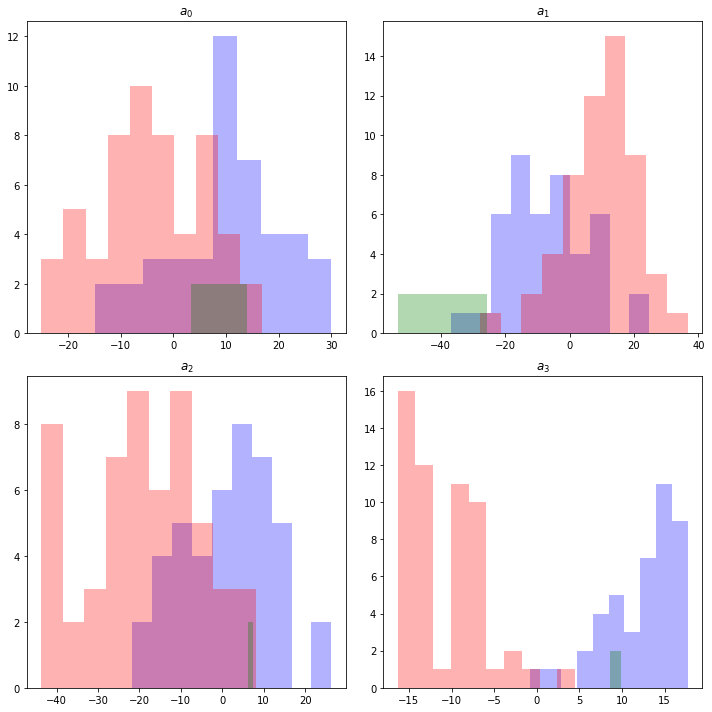

In [41]:
# Then we help you visualizing the scores with the library matplotlib
f, axarr = plt.subplots(2, 2,figsize=(10, 10))
for i in range(4):
    axarr[i // 2,  i % 2].hist(senator_scores[i, affiliations == "Blue"], color="Blue", alpha=0.3)
    axarr[i // 2,  i % 2].hist(senator_scores[i, affiliations == "Red"], color="Red", alpha=0.3)
    axarr[i // 2,  i % 2].hist(senator_scores[i, affiliations == "Yellow"], color="Green", bins=1, alpha=0.3)
    axarr[i // 2,  i % 2].set_title(r'$a_'+ str(i)  +'$')
plt.tight_layout()
plt.show()